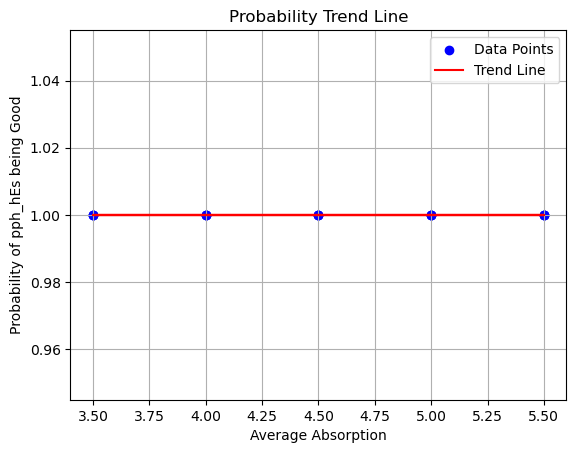

defaultdict(<function <lambda> at 0x000001B5DBDF7F60>, {'2012-01-01:0': {'hour': 0, 'pph_hEs': 5, 'avg_absp': 3.5}, '2012-01-01:1': {'hour': 1, 'pph_hEs': 6, 'avg_absp': 4.0}, '2012-01-01:2': {'hour': 2, 'pph_hEs': 7, 'avg_absp': 4.5}, '2012-01-01:3': {'hour': 3, 'pph_hEs': 8, 'avg_absp': 5.0}, '2012-01-01:4': {'hour': 4, 'pph_hEs': 9, 'avg_absp': 5.5}, '2012-01-02:0': {'hour': 0, 'pph_hEs': 5, 'avg_absp': 3.5}, '2012-01-02:1': {'hour': 1, 'pph_hEs': 6, 'avg_absp': 4.0}, '2012-01-02:2': {'hour': 2, 'pph_hEs': 7, 'avg_absp': 4.5}, '2012-01-02:3': {'hour': 3, 'pph_hEs': 8, 'avg_absp': 5.0}, '2012-01-02:4': {'hour': 4, 'pph_hEs': 9, 'avg_absp': 5.5}, '2012-01-03:0': {'hour': 0, 'pph_hEs': 5, 'avg_absp': 3.5}, '2012-01-03:1': {'hour': 1, 'pph_hEs': 6, 'avg_absp': 4.0}, '2012-01-03:2': {'hour': 2, 'pph_hEs': 7, 'avg_absp': 4.5}, '2012-01-03:3': {'hour': 3, 'pph_hEs': 8, 'avg_absp': 5.0}, '2012-01-03:4': {'hour': 4, 'pph_hEs': 9, 'avg_absp': 5.5}})


In [4]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# Example data
graph_plot_dict = defaultdict(lambda: {'hour': -1, 'pph_hEs': 0, 'avg_absp': -1})

# Function to check if pph_hEs is good or extra good
def check_quality(pph_hEs):
    if pph_hEs == 8:
        return "extra good"
    elif pph_hEs == 7:
        return "good"
    else:
        return "not good"

# Generate example data
for day in range(3):
    for hour in range(5):
        key = f"2012-01-{str(day+1).zfill(2)}:{hour}"
        pph_hEs = 5 + hour  # Example trend: decreases by hour
        avg_absp = 3.5 + hour * 0.5  # Example trend: increases by hour
        graph_plot_dict[key] = {'hour': hour, 'pph_hEs': pph_hEs, 'avg_absp': avg_absp}

# Calculate probability of pph_hEs being good for each absorption value
absorption_values = []
prob_good = []

for hour_data in graph_plot_dict.values():
    absorption_values.append(hour_data['avg_absp'])
    if check_quality(hour_data['pph_hEs']) == "good" or "extra good":
        prob_good.append(1)
    else:
        prob_good.append(0)

# Plot the scatter plot
plt.scatter(absorption_values, prob_good, color='blue', label='Data Points')

# Fit a polynomial line to the data
z = np.polyfit(absorption_values, prob_good, 1)
p = np.poly1d(z)
plt.plot(absorption_values,p(absorption_values),color='red',label='Trend Line')

plt.xlabel('Average Absorption')
plt.ylabel('Probability of pph_hEs being Good')
plt.title('Probability Trend Line')
plt.legend()
plt.grid(True)
plt.show()

print(graph_plot_dict)


In [8]:
import numpy as np

data = [3, 4, 5, 1, 5, 8, 9]
print(data)
data = np.array(data)
print(data)
threshold = 4
print(np.sum(data == threshold) / data.size)



[3, 4, 5, 1, 5, 8, 9]
[3 4 5 1 5 8 9]
0.14285714285714285
